In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pprint
import random
from fetch_db import reddit_data

In [2]:
# First

subreddit_labels = {1: "askhistorians", 2: "writingprompts", 
                    3: "television", 4: "explainlikeimfive", 
                    5: "lifeprotips", 6: "relationship_advice",
                    7: "science", 8: "books",
                    9: "nba", 10: "philosophy"}

In [3]:
# Second 

train_test_ratio = 0.90
train_valid_ratio = 0.90

In [4]:
# Third 

mod_data = []
for i in reddit_data:
    title_index = list(subreddit_labels.keys())[list(subreddit_labels.values()).index(i[2])]
    mod_data.append((title_index, i[1]))
    
random.shuffle(mod_data)

In [5]:
# Fourth

df_data = {"label": [], "text": []}

for i in mod_data:
    df_data["label"].append(i[0])
    df_data["text"].append(i[1])
    
df_data = pd.DataFrame(df_data)

In [6]:
# Fifth 

df_1 = df_data[df_data['label'] == 1]
df_2 = df_data[df_data['label'] == 2]
df_3 = df_data[df_data['label'] == 3]
df_4 = df_data[df_data['label'] == 4]
df_5 = df_data[df_data['label'] == 5]
df_6 = df_data[df_data['label'] == 6]
df_7 = df_data[df_data['label'] == 7]
df_8 = df_data[df_data['label'] == 8]
df_9 = df_data[df_data['label'] == 9]
df_10 = df_data[df_data['label'] == 10]

df_1_full_train, df_1_test = train_test_split(df_1, train_size = train_test_ratio, random_state = 1)
df_2_full_train, df_2_test = train_test_split(df_2, train_size = train_test_ratio, random_state = 1)
df_3_full_train, df_3_test = train_test_split(df_3, train_size = train_test_ratio, random_state = 1)
df_4_full_train, df_4_test = train_test_split(df_4, train_size = train_test_ratio, random_state = 1)
df_5_full_train, df_5_test = train_test_split(df_5, train_size = train_test_ratio, random_state = 1)
df_6_full_train, df_6_test = train_test_split(df_6, train_size = train_test_ratio, random_state = 1)
df_7_full_train, df_7_test = train_test_split(df_7, train_size = train_test_ratio, random_state = 1)
df_8_full_train, df_8_test = train_test_split(df_8, train_size = train_test_ratio, random_state = 1)
df_9_full_train, df_9_test = train_test_split(df_9, train_size = train_test_ratio, random_state = 1)
df_10_full_train, df_10_test = train_test_split(df_10, train_size = train_test_ratio, random_state = 1)

df_1_train, df_1_valid = train_test_split(df_1_full_train, train_size = train_valid_ratio, random_state = 1)
df_2_train, df_2_valid = train_test_split(df_2_full_train, train_size = train_valid_ratio, random_state = 1)
df_3_train, df_3_valid = train_test_split(df_3_full_train, train_size = train_valid_ratio, random_state = 1)
df_4_train, df_4_valid = train_test_split(df_4_full_train, train_size = train_valid_ratio, random_state = 1)
df_5_train, df_5_valid = train_test_split(df_5_full_train, train_size = train_valid_ratio, random_state = 1)
df_6_train, df_6_valid = train_test_split(df_6_full_train, train_size = train_valid_ratio, random_state = 1)
df_7_train, df_7_valid = train_test_split(df_7_full_train, train_size = train_valid_ratio, random_state = 1)
df_8_train, df_8_valid = train_test_split(df_8_full_train, train_size = train_valid_ratio, random_state = 1)
df_9_train, df_9_valid = train_test_split(df_9_full_train, train_size = train_valid_ratio, random_state = 1)
df_10_train, df_10_valid = train_test_split(df_10_full_train, train_size = train_valid_ratio, random_state = 1)

In [7]:
# Sixth 

df_train = pd.concat([df_1_train, df_2_train,
                      df_3_train, df_4_train,
                      df_5_train, df_6_train,
                      df_7_train, df_8_train,
                      df_9_train, df_10_train,], ignore_index=True, sort=False)
df_valid = pd.concat([df_1_valid, df_2_valid,
                      df_3_valid, df_4_valid,
                      df_5_valid, df_6_valid,
                      df_7_valid, df_8_valid,
                      df_9_valid, df_10_valid,], ignore_index=True, sort=False)
df_test = pd.concat([df_1_test, df_2_test,
                     df_3_test, df_4_test,
                     df_5_test, df_6_test,
                     df_7_test, df_8_test,
                     df_9_test, df_10_test,], ignore_index=True, sort=False)

In [8]:
# Seventh 

destination_folder = 'Data'

df_train.to_csv(destination_folder + '/train.csv', index=False)
df_valid.to_csv(destination_folder + '/valid.csv', index=False)
df_test.to_csv(destination_folder + '/test.csv', index=False)

In [9]:
# Eighth 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize='spacy', lower=True, include_lengths=True, batch_first=True)
fields = [('label', label_field), ('text', text_field)]

/Users/Hilal/opt/anaconda3/envs/chatbot/lib/python3.6/site-packages/torchtext/data/utils.py:123: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(f'Spacy model "{language}" could not be loaded, trying "{OLD_MODEL_SHORTCUTS[language]}" instead')


In [10]:
# Ninth 

train, valid, test = TabularDataset.splits(path=destination_folder, train='train.csv', validation='valid.csv', test='test.csv',
                                           format='CSV', fields=fields, skip_header=True)

train_iter = BucketIterator(train, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)
test_iter = BucketIterator(test, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)

text_field.build_vocab(train, min_freq=3)

In [11]:
class RNN(nn.Module):

    def __init__(self, dimension=128):
        super(RNN, self).__init__()

        self.embedding = nn.Embedding(len(text_field.vocab), 300)
        self.dimension = dimension
        self.rnn = nn.RNN(input_size=300,
                            hidden_size=dimension,
                            num_layers=1,
                            batch_first=True,
                            bidirectional=True)
        self.drop = nn.Dropout(p=0.5)

        self.fc = nn.Linear(2*dimension, 1)

    def forward(self, text, text_len):

        text_emb = self.embedding(text)

        packed_input = pack_padded_sequence(text_emb, text_len, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.rnn(packed_input)
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        out_forward = output[range(len(output)), text_len - 1, :self.dimension]
        out_reverse = output[:, 0, self.dimension:]
        out_reduced = torch.cat((out_forward, out_reverse), 1)
        text_fea = self.drop(out_reduced)

        text_fea = self.fc(text_fea)
        text_fea = torch.squeeze(text_fea, 1)
        text_out = torch.sigmoid(text_fea)

        return text_out

In [12]:
# Save and Load Functions

def save_checkpoint(save_path, model, optimizer, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_checkpoint(load_path, model, optimizer):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    
    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [13]:
# Training Function

def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = destination_folder,
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        for (labels, (text, text_len)), _ in train_loader:           
            labels = labels.to(device)
            text = text.to(device)
            text_len = text_len.to(device)
            output = model(text, text_len)

            loss = criterion(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    
                  # validation loop
                  for (labels, (text, text_len)), _ in valid_loader:
                        labels = labels.to(device)
                        text = text.to(device)
                        text_len = text_len.to(device)
                        output = model(text, text_len)
                        
                        loss = criterion(output, labels)
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/model.pt', model, optimizer, best_valid_loss)
                    save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')


model = RNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=10)

Epoch [1/10], Step [13/260], Train Loss: -12.5357, Valid Loss: -26.8746
Model saved to ==> Data/model.pt
Model saved to ==> Data/metrics.pt
Epoch [1/10], Step [26/260], Train Loss: -33.4292, Valid Loss: -52.9525
Model saved to ==> Data/model.pt
Model saved to ==> Data/metrics.pt
Epoch [2/10], Step [39/260], Train Loss: -72.1177, Valid Loss: -72.0423
Model saved to ==> Data/model.pt
Model saved to ==> Data/metrics.pt
Epoch [2/10], Step [52/260], Train Loss: -296.7116, Valid Loss: -452.1635
Model saved to ==> Data/model.pt
Model saved to ==> Data/metrics.pt
Epoch [3/10], Step [65/260], Train Loss: -473.4563, Valid Loss: -452.1635
Epoch [3/10], Step [78/260], Train Loss: -393.1717, Valid Loss: -452.1635
Epoch [4/10], Step [91/260], Train Loss: -481.1699, Valid Loss: -452.1635
Epoch [4/10], Step [104/260], Train Loss: -395.1923, Valid Loss: -452.1635
Epoch [5/10], Step [117/260], Train Loss: -476.5368, Valid Loss: -452.1635
Epoch [5/10], Step [130/260], Train Loss: -395.1923, Valid Loss: -

Model loaded from <== Data/metrics.pt


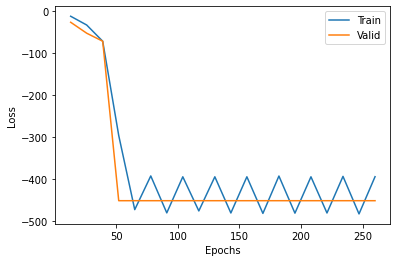

In [14]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [15]:
print(len(df_data))
print(len(df_train))
print(len(df_valid))
print(len(df_test))

994
804
90
100


In [96]:
631 + 568 + 5100

6299